In [ ]:
!nvidia-smi

Mon Apr 14 10:50:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install "huggingface_hub[hf_transfer]"
!pip install -U "huggingface_hub[cli]"
!HF_HUB_ENABLE_HF_TRANSFER=1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.1
    Uninstalling huggingface-hub-0.30.1:
      Successfully uninstalled huggingface-hub-0.30.1


In [ ]:
!git clone https://github.com/PaulBorneP/MESA.git
!cd MESA

Cloning into 'MESA'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 5), reused 12 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 715.33 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
!mkdir weights
!huggingface-cli download NewtNewt/MESA --local-dir weights

Fetching 17 files:   0% 0/17 [00:00<?, ?it/s]Downloading 'LICENSE' to 'weights/.cache/huggingface/download/DhCjcNQuMpl4FL346qr3tvNUCgY=.0935534a8f4fe39a8b2c4e46e6bbcbb6ebff5cf8.incomplete'

model_index.json: 100% 641/641 [00:00<00:00, 3.88MB/s]
Download complete. Moving file to weights/model_index.json

scheduler_config.json: 100% 538/538 [00:00<00:00, 3.81MB/s]
Download complete. Moving file to weights/scheduler/scheduler_config.json

.gitattributes: 100% 1.57k/1.57k [00:00<00:00, 11.2MB/s]
Download complete. Moving file to weights/.gitattributes

Fetching 17 files:   6% 1/17 [00:00<00:03,  4.14it/s]Downloading 'text_encoder/model.safetensors' to 'weights/.cache/huggingface/download/text_encoder/xGOKKLRSlIhH692hSVvI1-gpoa8=.bc1827c465450322616f06dea41596eac7d493f4e95904dcb51f0fc745c4e13f.incomplete'


README.md: 100% 126/126 [00:00<00:00, 731kB/s]
Download complete. Moving file to weights/README.md


LICENSE: 100% 3.62k/3.62k [00:00<00:00, 34.7MB/s]
Download complete. Moving file to w

In [ ]:
import matplotlib.pyplot as plt
import torch

from MESA.pipeline_terrain import TerrainDiffusionPipeline
import MESA.models as models

In [ ]:
import sys
sys.path.append('MESA/')

In [ ]:
pipe = TerrainDiffusionPipeline.from_pretrained("./weights", torch_dtype=torch.float16)
pipe.to("cuda");

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
prompt = "A sentinel-2 image of montane forests and mountains in Mexico in August"
seed = 42

generator = torch.Generator("cuda").manual_seed(seed)
image,dem = pipe(prompt, num_inference_steps=50, guidance_scale=7.5,generator=generator)

  0%|          | 0/50 [00:00<?, ?it/s]

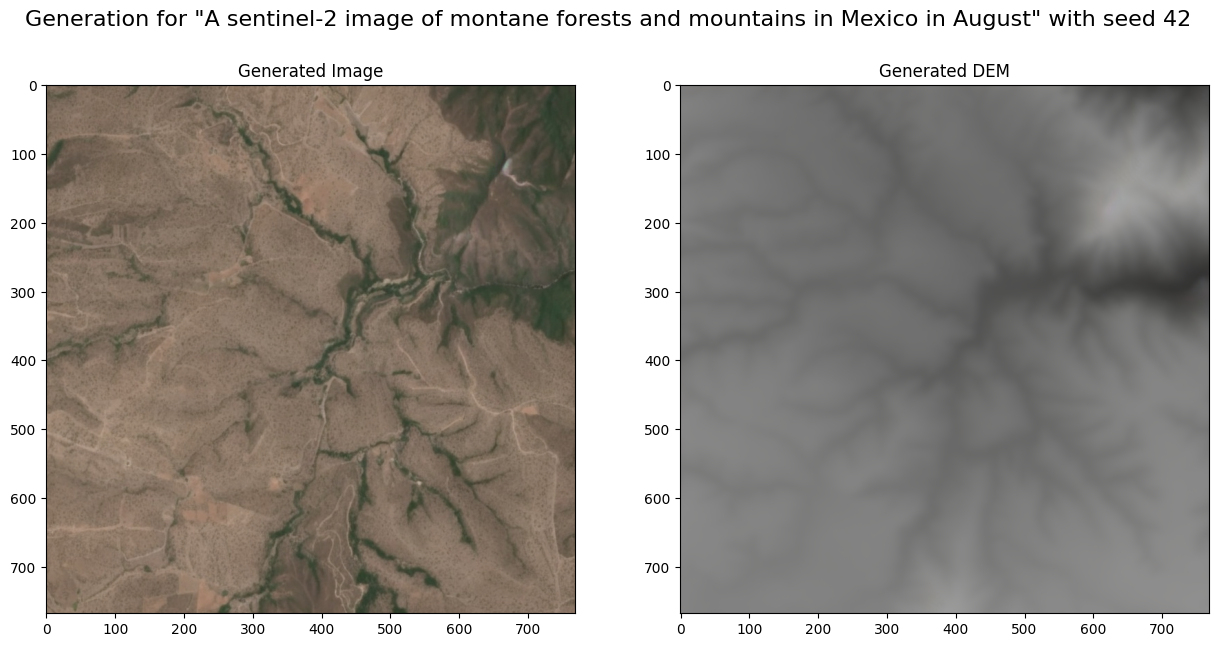

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle(f"""Generation for "{prompt}" with seed {seed}""",fontsize=16)
ax[0].imshow(image[0])
ax[0].set_title("Generated Image")
ax[1].imshow(dem[0])
ax[1].set_title("Generated DEM")
plt.show()